# Descripción del conjunto de datos:

Columna 1: Edad en días de un pez.

Columna 2: Temperatura del agua en grados Celsius.

Columna 3 (Salida): Largo del pez

Nro de ejemplos: 44.

Tarea

    Objetivo: Crear un modelo para predecir el largo de un pez a partir de su edad y la temperatura del agua.
    Utilice el algoritmo de regresión lineal (Gradiente descendente) para esta tarea . 
    Utilice el 70% de los datos para entrenamiento y el 30% restante para evaluación.
    Cómo métrica de rendimiento utilice el Error cuadrático medio.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [23]:

#Funciones ---------------

def error_cuadratico_medio(y,ytrain):
    rms = (mean_squared_error(y, ytrain))
    return rms

#funcion costo
def fCosto(X,y,theta):
    suma = np.power(((X @ theta.T)-y),2)
    return np.sum(suma)/(2 * len(X))

#gradiente descente (funcion que minimiza el costo)
def gradienteDescendente(X,y,theta,iters,alpha):
    costo = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        costo[i] = fCosto(X, y, theta)
    
    return theta,costo



In [3]:
data = pd.read_csv('datos.csv',sep=";") #leo archivo

In [4]:
data = (data - data.mean())/ data.std()    #normalizando los datos

In [5]:
#separando los datos 
X = data.iloc[:,0:2]  #selecciono edad y temperatura
ones = np.ones([X.shape[0],1]) #columnas de unos
X = np.concatenate((ones,X),axis=1) #uno la matriz de unos con X

y = data.iloc[:,2:3].values #variable dependiente
theta = np.zeros([1,3])




In [6]:
#separando datos por entrenamiento y test

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)

In [7]:
alpha = 0.01
iters = 1000


g,costo = gradienteDescendente(X,y,theta,iters,alpha)
print(g)

g2,costo2 = gradienteDescendente(xtrain,ytrain,theta,iters,alpha)
print(g2)

g3,costo3 = gradienteDescendente(xtest,ytest,theta,iters,alpha)
print(g3)


costoTotal = fCosto(X,y,g) #costo total sin entrenar
costoTotal2 = fCosto(xtrain,ytrain,g2)  #costo total entrenamiento
costoTotal3 =  fCosto(xtest,ytest,g3)  #costo total entrenamiento


print("\ncosto sin entrenar: ",costoTotal2)
print("\ncosto entrenamiento: ",costoTotal2)
print("\ncosto test: ",costoTotal3)


[[ 1.94601280e-16  8.79067983e-01 -1.81108135e-01]]
[[-0.0832807   0.83123059 -0.13509699]]
[[ 0.13287471  1.01003084 -0.1933524 ]]

costo sin entrenar:  0.110542547369046

costo entrenamiento:  0.110542547369046

costo test:  0.03357812194253625


Text(0.5, 1.0, 'Error vs. Training ')

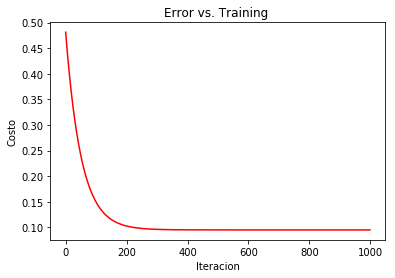

In [13]:
#Grafica de la funcion costo, como va cambiando con cada iteracion (sin entrentar)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'r')  
ax.set_xlabel('Iteracion')  
ax.set_ylabel('Costo')  
ax.set_title('Error vs. Training ')

Text(0.5, 1.0, 'Error vs. Training ')

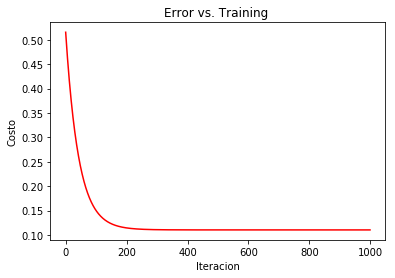

In [14]:
#Grafica de la funcion costo, como va cambiando con cada iteracion (entrenar)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo2, 'r')  
ax.set_xlabel('Iteracion')  
ax.set_ylabel('Costo')  
ax.set_title('Error vs. Training ')

Text(0.5, 1.0, 'Error vs. Training ')

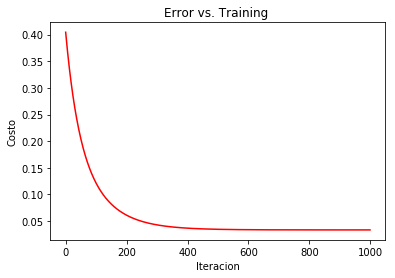

In [15]:
#Grafica de la funcion costo, como va cambiando con cada iteracion (test)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo3, 'r')  
ax.set_xlabel('Iteracion')  
ax.set_ylabel('Costo')  
ax.set_title('Error vs. Training ')

## Error cuadratico medio

In [24]:
error_train = error_cuadratico_medio(g,g2)   #g es gradiente 100%, g2 gradiente 70
print("error cuadratico medio datos de entrenamiento", error_train)

error_test = error_cuadratico_medio(g,g3)    
print("error cuadratico medio datos de entrenamiento", error_test)

error cuadratico medio datos de entrenamiento 0.061484733086649264
error cuadratico medio datos de entrenamiento 0.10794578682466204


# comparación

In [16]:
#comparacion gradiente con con regresion con normal ecuaciones normales

# minimos cuadrados (sin entrenar)

B = np.linalg.inv(X.T @ X) @ X.T @ y

print("\nbeta dio:",B, "\ny el gradiente dio ",g)


#regresion lineal minimos cuadrados (entrenar)
B2 = np.linalg.inv(xtest.T @ xtest) @ xtest.T @ ytest
print("\nbeta test dio: \t",B2, "\ny el gradiente dio: \t",g2)


#regresion lineal minimos cuadrados (test)
B3 = np.linalg.inv(xtrain.T @ xtrain) @ xtrain.T @ytrain
print("\nbeta train dio:",B3, "y el gradiente dio: \t",g3)






beta dio: [[ 2.09901541e-16]
 [ 8.79115728e-01]
 [-1.81117971e-01]] 
y el gradiente dio  [[ 1.94601280e-16  8.79067983e-01 -1.81108135e-01]]

beta test dio: 	 [[ 0.1318487 ]
 [ 1.01463225]
 [-0.19260924]] 
y el gradiente dio: 	 [[-0.0832807   0.83123059 -0.13509699]]

beta train dio: [[-0.08324207]
 [ 0.83125111]
 [-0.13513316]] y el gradiente dio: 	 [[ 0.13287471  1.01003084 -0.1933524 ]]
